Testing the histogram plotting function

In [79]:
# import statements        
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import datetime as dt
import random

# my files
import db_connection
import db_edit
import db_search
import file_io
import quality_control_tests
from graphs_helper import *

import statsmodels.discrete.discrete_model as sm
from scipy.stats import poisson
from scipy.special import factorial



mysql connection successfully established with DATA_SILSO_HISTO
data successfully retrieved
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
observers sucessfully retrieved
Closing MySQL connection...


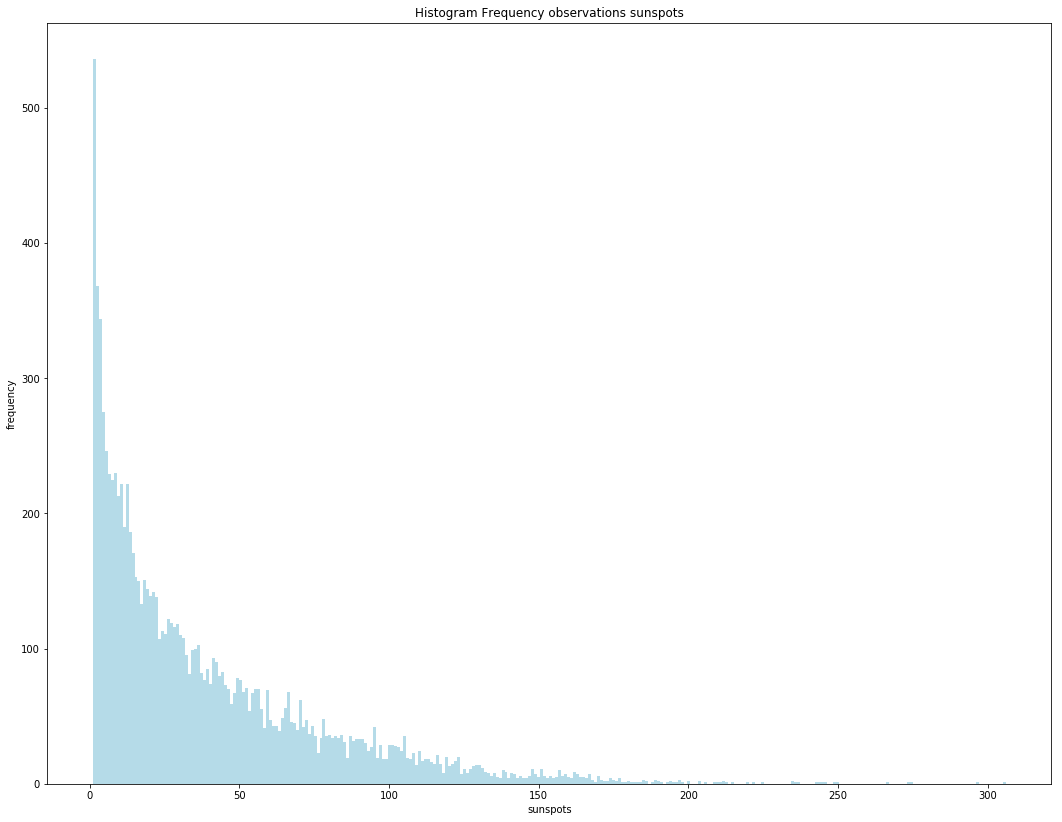

In [6]:
weights = frequency_wolf_histogram(observer="Wolfer",
                                   option="sunspots",
                                   zero=False,bins=60,
                                   only_blue=True)

In [40]:
#weights

In [49]:
res = sm.Poisson(endog=weights,
           exog=[i for i in range(len(weights))]).fit()

Optimization terminated successfully.
         Current function value: 118.619772
         Iterations 13


In [52]:
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  306
Model:                        Poisson   Df Residuals:                      305
Method:                           MLE   Df Model:                            0
Date:                Fri, 09 Aug 2019   Pseudo R-squ.:                  -1.995
Time:                        12:21:27   Log-Likelihood:                -36298.
converged:                       True   LL-Null:                       -12119.
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0094      0.000     91.041      0.000       0.009       0.010
==============================================================================
"""

In [43]:
len(res.predict())

306

In [44]:
len(weights)

306

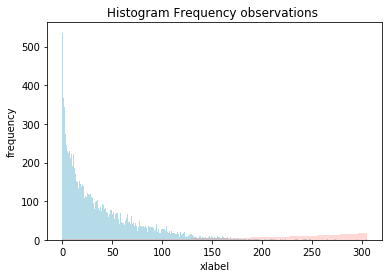

In [75]:
x_array=[i for i in range(len(weights))]
fig, ax = plt.subplots()
    
ax.hist(x_array, weights=weights, bins=len(weights), 
        color='lightblue', alpha=0.9)
ax.hist(x_array, weights=res.predict(), bins =len(weights), 
        color='salmon', alpha=0.3)# alpha is transparency

ax.set(title='Histogram Frequency observations ',
       ylabel='frequency',xlabel="xlabel")

ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.show()

In [80]:
def poiss(k, lamb):
     return (lamb**k/factorial(k))*np.exp(-lamb)

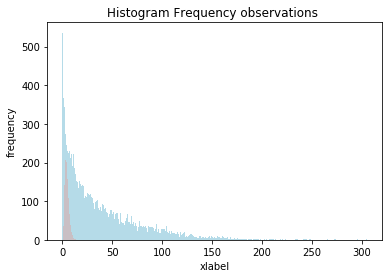

In [87]:
x_array=[i for i in range(len(weights))]
fig, ax = plt.subplots()
    
ax.hist(x_array, weights=weights, bins=len(weights), 
        color='lightblue', alpha=0.9)
ax.hist(x_array, weights=[poiss(3.4,i)*1000 for i in range(len(x_array))],
        bins =len(weights), 
        color='salmon', alpha=0.3)# alpha is transparency

ax.set(title='Histogram Frequency observations ',
       ylabel='frequency',xlabel="xlabel")

ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.show()